In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reasons-of-drug-addiction-edited/4.csv
/kaggle/input/drug-addiction-in-bangladesh-reasons-smote/DrugAddictioninBangladesh_Smoted.csv
/kaggle/input/drug-addiction-in-bangladesh-reasons/drugAddiction.csv


In [2]:
 !pip install --upgrade pip
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
! pip install -q scikit-plot
import scikitplot as skplt

df = pd.read_csv('/kaggle/input/drug-addiction-in-bangladesh-reasons-smote/DrugAddictioninBangladesh_Smoted.csv')

df.head(100)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,average_precision_score,recall_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,StandardScaler,LabelEncoder,MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest,chi2

from keras.models import Sequential
from keras.layers import Activation,BatchNormalization
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [3]:
data = pd.read_csv('/kaggle/input/drug-addiction-in-bangladesh-reasons-smote/DrugAddictioninBangladesh_Smoted.csv')
data.head()

,Age,Gender,Education,Live with,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,Suicidal thoughts,Family relationship,...,Withdrawal symptoms,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Class
0,2.0,1.0,4.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2
1,2.0,1.0,3.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,3
2,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2
3,2.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2
4,2.0,1.0,4.0,1.0,2.0,3.0,2.0,1.0,2.0,1.0,...,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,4


In [4]:
data.duplicated().sum()

9

In [5]:
data = data.drop_duplicates()

In [6]:
data.head()

,Age,Gender,Education,Live with,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,Suicidal thoughts,Family relationship,...,Withdrawal symptoms,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Class
0,2.0,1.0,4.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2
1,2.0,1.0,3.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,3
2,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2
3,2.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2
4,2.0,1.0,4.0,1.0,2.0,3.0,2.0,1.0,2.0,1.0,...,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 439
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             431 non-null    float64
 1   Gender                          431 non-null    float64
 2   Education                       431 non-null    float64
 3   Live with                       431 non-null    float64
 4   Motive about drug               431 non-null    float64
 5   Spend most time                 431 non-null    float64
 6   Failure in life                 431 non-null    float64
 7   Mental/emotional problem        431 non-null    float64
 8   Suicidal thoughts               431 non-null    float64
 9   Family relationship             431 non-null    float64
 10  Financials of family            431 non-null    float64
 11  Addicted person in family       431 non-null    float64
 12  Withdrawal symptoms             431 

In [8]:
data.isna().sum()

Age                               0
Gender                            0
Education                         0
Live with                         0
Motive about drug                 0
Spend most time                   0
Failure in life                   0
Mental/emotional problem          0
Suicidal thoughts                 0
Family relationship               0
Financials of family              0
Addicted person in family         0
Withdrawal symptoms               0
Satisfied with workplace          0
Case in court                     0
Living with drug user             0
Smoking                           0
Ever taken drug                   0
Friends influence                 0
If chance given to taste drugs    0
Easy to control use of drug       0
Class                             0
dtype: int64

In [9]:
num_columns = data.shape[1]

In [10]:
corr = data.corr()

<AxesSubplot:>

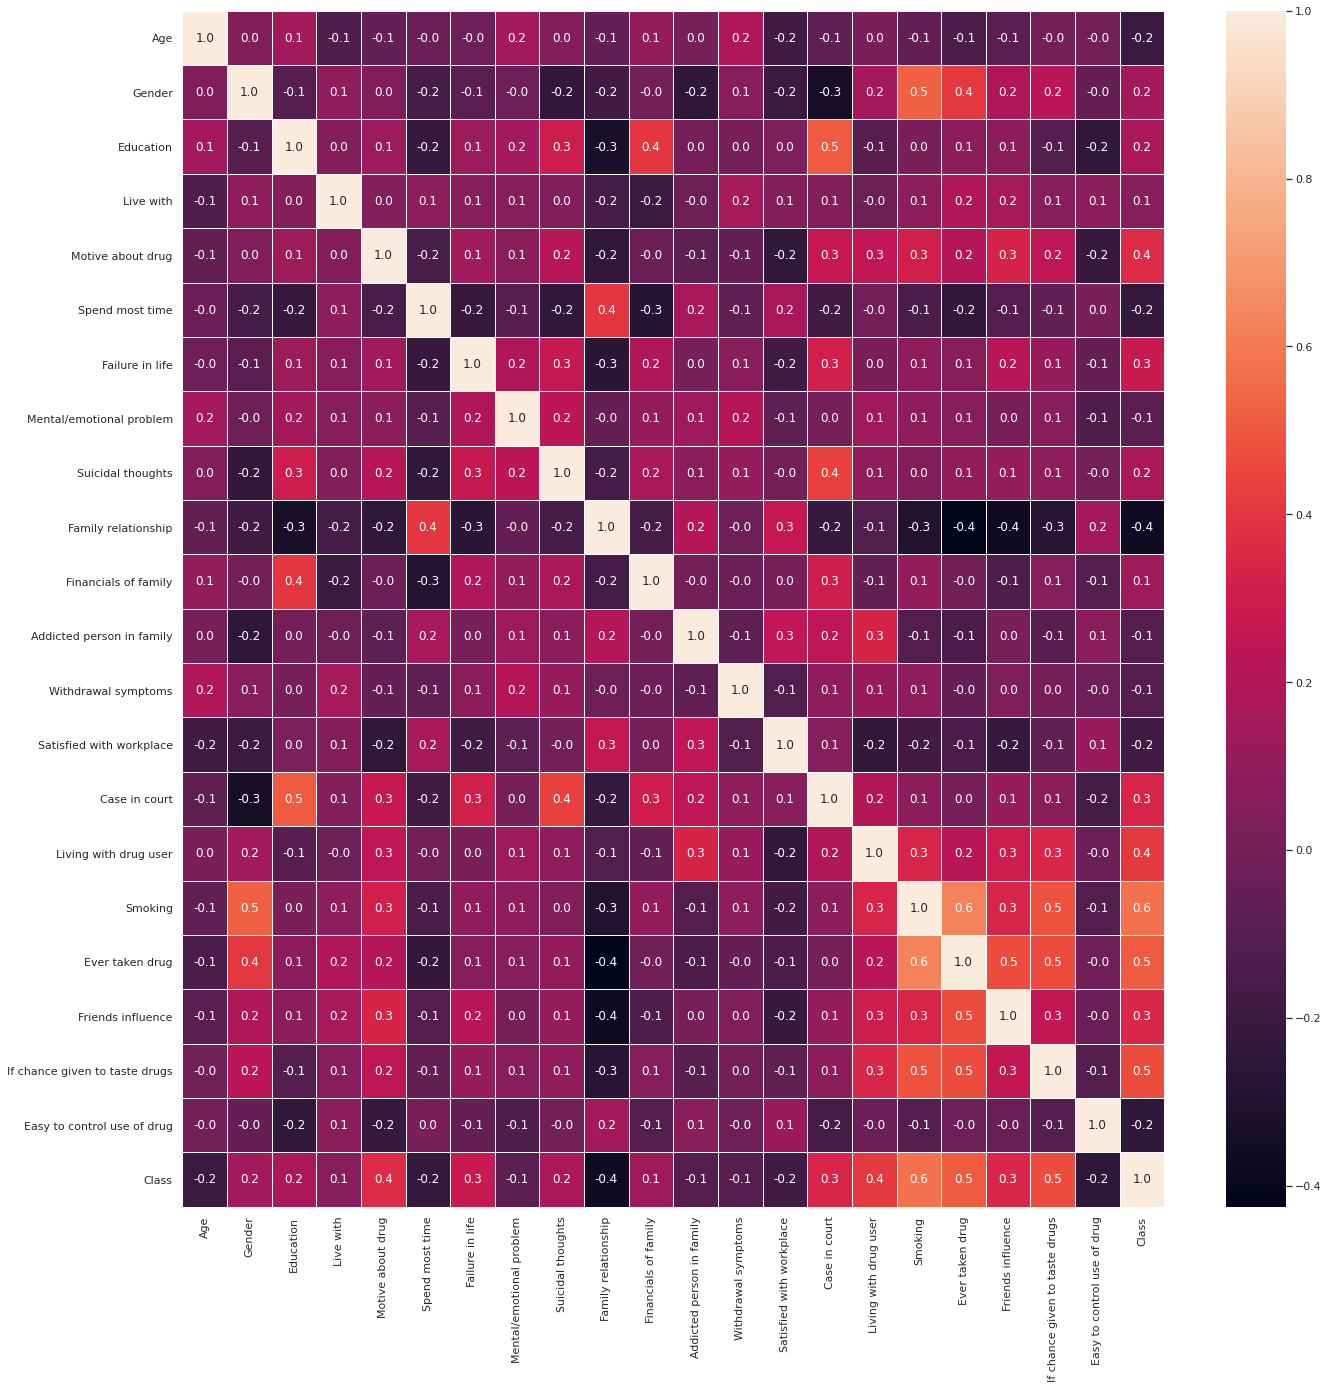

In [11]:
f,ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<AxesSubplot:xlabel='Class', ylabel='count'>

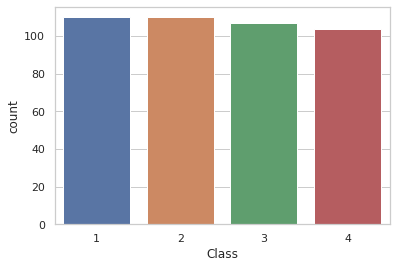

In [12]:
sns.countplot(x='Class',data=data)

In [13]:
print(data.shape)

(431, 22)


In [14]:
data_norm = data.copy()

In [15]:
colunas_normalizar = ['Education','Spend most time','Mental/emotional problem','Family relationship','Financials of family','Addicted person in family','Living with drug user','Ever taken drug','Friends influence','If chance given to taste drugs']

tipo_scaler = 'MinMax'
if(tipo_scaler=='Standard'):
    scaler = StandardScaler((0,1))
elif(tipo_scaler=='Robust'):
    scaler = RobustScaler()
elif(tipo_scaler=='MinMax'):
    scaler = MinMaxScaler(feature_range=(0, 1))

for col in colunas_normalizar:
    data_norm[col] = scaler.fit_transform(data_norm[col].values.reshape(-1,1))

In [16]:
data_norm.head()

,Age,Gender,Education,Live with,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,Suicidal thoughts,Family relationship,...,Withdrawal symptoms,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Class
0,2.0,1.0,0.75,2.0,1.0,1.0,1.0,0.0,1.0,0.0,...,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,2
1,2.0,1.0,0.50,1.0,3.0,0.5,1.0,0.0,2.0,0.0,...,1.0,2.0,2.0,0.5,1.0,0.0,0.0,1.0,1.0,3
2,1.0,1.0,0.50,1.0,1.0,0.5,1.0,0.0,1.0,0.5,...,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2
3,2.0,1.0,0.75,1.0,2.0,0.5,1.0,0.0,2.0,0.5,...,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,2
4,2.0,1.0,0.75,1.0,2.0,1.0,2.0,0.0,2.0,0.0,...,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0,4


In [17]:
from sklearn import preprocessing
X = data_norm.drop('Class',axis=1).values
Y = data_norm['Class'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=0)

In [19]:
logreg = LogisticRegression(C=1,max_iter=10000,penalty='l1',solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='liblinear')

In [20]:
#List to compute metrics
accuracy = []
precision =[]
recall = []
f1 = []
roc = []

In [21]:
#Logistic Regression
logreg = LogisticRegression(C=1,max_iter=10000,penalty='l1',solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='liblinear')

In [22]:
log_reg_score = cross_val_score(logreg, X_train, y_train, cv=10,scoring='roc_auc_ovo')
log_reg_score_teste = cross_val_score(logreg, X_test, y_test, cv=10,scoring='roc_auc_ovo')
print('Score Logistic Regression Training: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
print('Score Logistic Regression Test: ', round(log_reg_score_teste.mean() * 100, 2).astype(str) + '%')

Score Logistic Regression Training:  90.16%
Score Logistic Regression Test:  86.44%


<AxesSubplot:>

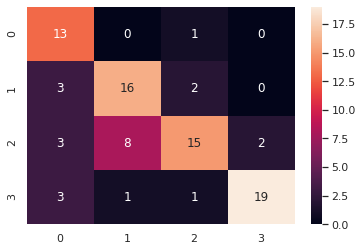

In [23]:
Y_pred_logreg = logreg.predict(X_test)
cm = confusion_matrix(y_test,Y_pred_logreg)
sns.heatmap(cm,annot=True,fmt="d")

In [24]:
#KNN. parameters have been choosing using GridSearchCV
knn = KNeighborsClassifier(weights='uniform',n_neighbors=27,leaf_size=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=6, n_neighbors=27)

In [25]:
knears_score = cross_val_score(knn, X_train, y_train, cv=10,scoring='roc_auc_ovo')
knears_score_teste = cross_val_score(knn, X_test, y_test, cv=10,scoring='roc_auc_ovo')
print('Score KNN Training: ', round(knears_score.mean() * 100, 2).astype(str) + '%')
print('Score KNN Test: ', round(knears_score_teste.mean() * 100, 2).astype(str) + '%')

Score KNN Training:  83.95%
Score KNN Test:  72.74%


<AxesSubplot:>

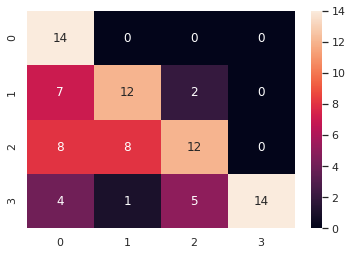

In [26]:
Y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test,Y_pred_knn)
sns.heatmap(cm,annot=True,fmt="d")

In [27]:
#RANDOM Forest
random_forest = RandomForestClassifier(max_depth=10,n_estimators=350)
random_forest.fit(X_train,y_train)

forest_score = cross_val_score(random_forest, X_train, y_train, cv=10,scoring='roc_auc_ovo')
forest_score_teste = cross_val_score(random_forest, X_test, y_test, cv=10,scoring='roc_auc_ovo')
print('Score RFC Training: ', round(forest_score.mean() * 100, 2).astype(str) + '%')
print('Score RFC Test: ', round(forest_score_teste.mean() * 100, 2).astype(str) + '%')


Y_pred_rf = random_forest.predict(X_test)

Score RFC Training:  98.31%
Score RFC Test:  96.41%


<AxesSubplot:>

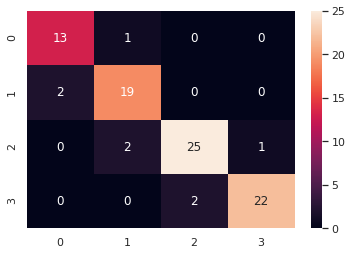

In [28]:
cm = confusion_matrix(y_test,Y_pred_rf)
sns.heatmap(cm,annot=True,fmt="d")

In [29]:
#Gradient Boosting
grad_boost = GradientBoostingClassifier(n_estimators=65,max_depth=4)
grad_boost.fit(X_train, y_train)

grad_score = cross_val_score(grad_boost, X_train, y_train, cv=10,scoring='roc_auc_ovo')
grad_score_teste = cross_val_score(grad_boost, X_test, y_test, cv=10,scoring='roc_auc_ovo')
print('Score GradBoost Training: ', round(grad_score.mean() * 100, 2).astype(str) + '%')
print('Score GradBoost Test: ', round(grad_score_teste.mean() * 100, 2).astype(str) + '%')

Y_pred_gb = grad_boost.predict(X_test)

Score GradBoost Training:  96.58%
Score GradBoost Test:  93.38%


<AxesSubplot:>

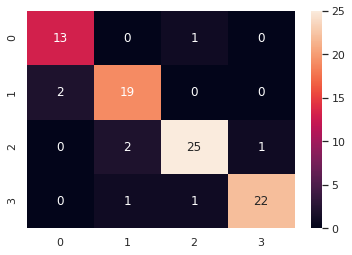

In [30]:
cm = confusion_matrix(y_test,Y_pred_gb)
sns.heatmap(cm,annot=True,fmt="d")